**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [ ]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [ ]:
C_train.isna().sum()

congested          0
theta_past_ma10    1
dtype: int64

## Drop nan for classification Data

In [ ]:
C_train =C_train.dropna()

In [ ]:
C_train.head()

,congested,theta_past_ma10
1,1,26.0
2,1,26.5
3,1,26.0
4,1,25.0
5,1,23.8


In [ ]:
C_test.isna().sum()

congested          0
theta_past_ma10    0
dtype: int64

## import train and test data for Regression

In [ ]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ava/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [ ]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [ ]:
R_train=R_train.dropna()

In [ ]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [ ]:
R_train.head()

,theta,theta_past_ma10
1,27,26.0
2,25,26.5
3,22,26.0
4,19,25.0
5,19,23.8


In [ ]:
R_test.head()

,theta,theta_past_ma10
154,35,34.7
155,30,34.5
156,36,33.7
157,37,33.6
158,37,33.5


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [ ]:
C_train.head()

,congested,theta_past_ma10
1,1,26.0
2,1,26.5
3,1,26.0
4,1,25.0
5,1,23.8


In [ ]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [ ]:
C_test.head()

,congested,theta_past_ma10
154,1,34.7
155,1,34.5
156,1,33.7
157,1,33.6
158,1,33.5


In [ ]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [ ]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Evaluations

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        76

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


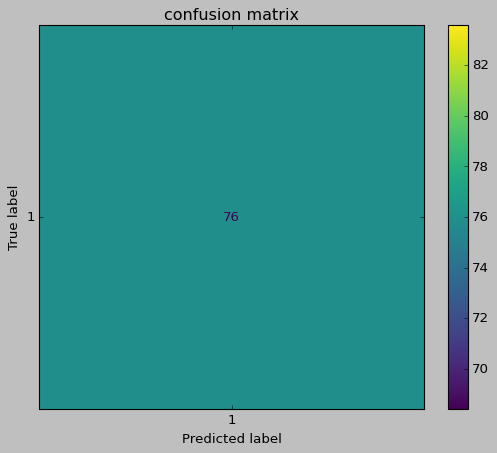

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [ ]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-59-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [ ]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        76

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


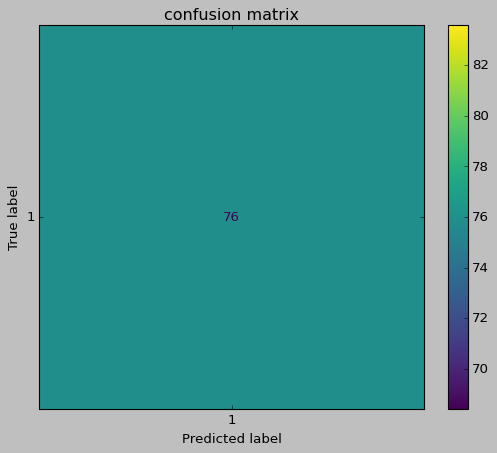

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [ ]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        76

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


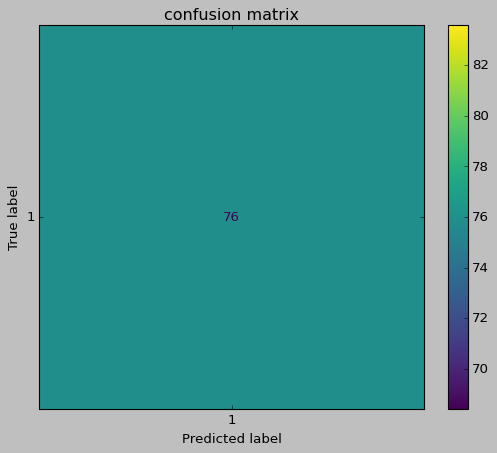

In [ ]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [ ]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [ ]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

ValueError: ignored

# Machine Learning Regression

## important global packages

In [ ]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [ ]:
R_train.head()

,theta,theta_past_ma10
1,27,26.0
2,25,26.5
3,22,26.0
4,19,25.0
5,19,23.8


In [ ]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [ ]:
R_test.head()

,theta,theta_past_ma10
154,35,34.7
155,30,34.5
156,36,33.7
157,37,33.6
158,37,33.5


In [ ]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [ ]:
from sklearn import linear_model

In [ ]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [ ]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.04453206280327815


In [ ]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,34.640099
1,34.450904
2,33.694124
3,33.599527
4,33.504929
...,...
71,43.059277
72,44.099850
73,43.532265
74,41.545717


ImportError: ignored

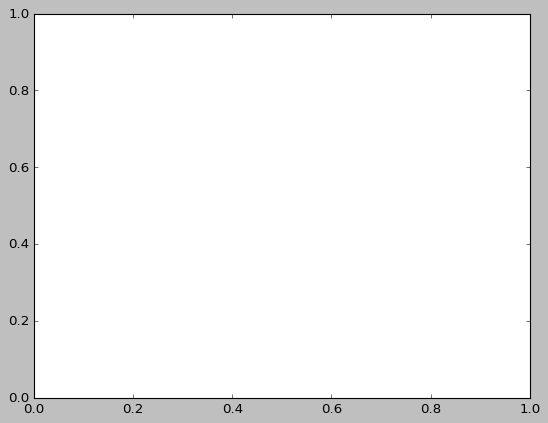

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-94-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [ ]:
# calculate R2
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.27926736118804185


In [ ]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,31.881024
1,35.568667
2,43.760833
3,38.293833
4,37.387167
...,...
71,31.320000
72,31.320000
73,31.320000
74,31.320000


ImportError: ignored

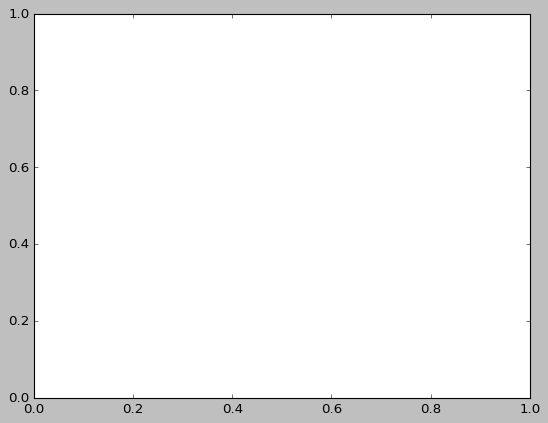

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [ ]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [ ]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [ ]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    153
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (49, 14, 28.08497, 7.9942)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12202.26 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of each featu

[1000]	valid_set's rmse: 3.72579


	-3.7275	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...
	-3.7471	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4.2204	 = Validation score   (-root_mean_squared_error)
	1.23s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
	-3.7392	 = Validation score   (-root_mean_squared_error)
	0.65s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-4.1937	 = Validation score   (-root_mean_squared_error)
	1.24s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 7: early stopping
	-3.7303	 = Validation score   (-root_mean_squared_error)
	2.61s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-4.0796	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Train

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-9.292211,-9.292211,-86.345185,-4.750603,-3.044922,-0.110888,-3.756153,0.009522,0.006871,1.041255,0.009522,0.006871,1.041255,1,True,10
1,KNeighborsUnif,-9.468090,-9.468090,-89.644727,-4.939473,-2.599998,-0.153339,-4.027806,0.027452,0.098346,0.041258,0.027452,0.098346,0.041258,1,True,1
2,WeightedEnsemble_L2,-9.565779,-9.565779,-91.504137,-4.935088,-2.954138,-0.177261,-3.687911,0.137875,0.081709,6.407310,0.005223,0.004259,1.413863,2,True,12
3,LightGBM,-9.604901,-9.604901,-92.254132,-4.922309,-2.998135,-0.186910,-3.747064,0.012270,0.028566,0.568239,0.012270,0.028566,0.568239,1,True,4
4,LightGBMXT,-9.615384,-9.615384,-92.455614,-4.941494,-2.889961,-0.189503,-3.727469,0.065654,0.034739,0.578047,0.065654,0.034739,0.578047,1,True,3
5,NeuralNetFastAI,-9.755627,-9.755627,-95.172256,-5.163351,-3.340027,-0.224454,-3.730309,0.050337,0.023939,2.611014,0.050337,0.023939,2.611014,1,True,8
6,LightGBMLarge,-9.832487,-9.832487,-96.677799,-5.237411,-3.086838,-0.243824,-3.789939,0.007139,0.011901,0.763130,0.007139,0.011901,0.763130,1,True,11
7,CatBoost,-9.908066,-9.908066,-98.169774,-5.254080,-2.716681,-0.263019,-3.739181,0.002802,0.006403,0.646675,0.002802,0.006403,0.646675,1,True,6
8,KNeighborsDist,-9.982998,-9.982998,-99.660253,-5.776674,-3.611465,-0.282195,-4.335863,0.025856,0.040528,0.014789,0.025856,0.040528,0.014789,1,True,2
9,RandomForestMSE,-10.343830,-10.343830,-106.994813,-6.141498,-3.881651,-0.376559,-4.220413,0.166015,0.145974,1.233659,0.166015,0.145974,1.233659,1,True,5


In [ ]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -0.17726122125564547


In [ ]:
y_pred = predictor.predict(X_test)
y_pred

154    33.598965
155    33.583282
156    34.402752
157    33.983829
158    33.974487
         ...    
225    34.098492
226    34.149231
227    34.121845
228    34.022327
229    33.984543
Name: target, Length: 76, dtype: float32

ImportError: ignored

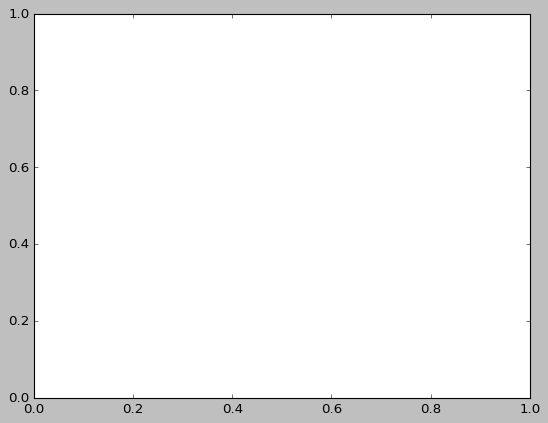

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
